In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime

%matplotlib inline

In [2]:
# https://fred.stlouisfed.org/categories/94
# DEXJPUS = USDJPY
# DEXUSEU = EURUSD
# DEXUSUK = GBPUSD
# DEXSZUS = USDCHF

start = datetime.datetime(2006, 12, 1)
end = datetime.datetime(2017, 1, 1)

ccy = web.DataReader('DEXUSUK', 'fred', start, end)
ccy.rename(columns={'DEXUSUK': 'price'}, inplace=True)
ccy = ccy.fillna(method='pad')
ccy.head()

,price
DATE,
2006-12-01,1.9794
2006-12-04,1.9788
2006-12-05,1.9746
2006-12-06,1.9692
2006-12-07,1.9628


In [3]:
ccy = ccy.assign(daily_ret = ccy.price.pct_change(1))
ccy = ccy.assign(yest_ret = ccy.daily_ret.shift(1))
ccy = ccy.assign(tmrw_price = ccy.price.shift(-1))
ccy = ccy.assign(tmrw_ret = ccy.daily_ret.shift(-1))
ccy = ccy.loc['20070101':]

In [4]:
def momentum_signal(row):
    if row.daily_ret > 0 and row.yest_ret > 0:
        return 1
    if row.daily_ret < 0 and row.yest_ret < 0:
        return -1
    return 0

ccy = ccy.assign(momentum_signal = ccy.apply(momentum_signal, axis=1))
ccy.head()

,price,daily_ret,yest_ret,tmrw_price,tmrw_ret,momentum_signal
DATE,,,,,,
2007-01-01,1.9586,0.000000,-0.001784,1.9736,0.007659,0
2007-01-02,1.9736,0.007659,0.000000,1.9498,-0.012059,0
2007-01-03,1.9498,-0.012059,0.007659,1.9443,-0.002821,0
2007-01-04,1.9443,-0.002821,-0.012059,1.9305,-0.007098,-1
2007-01-05,1.9305,-0.007098,-0.002821,1.9385,0.004144,-1


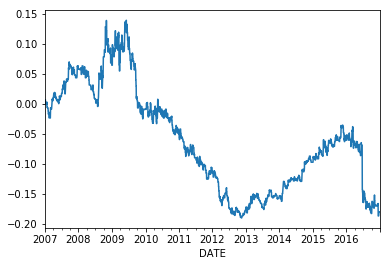

In [5]:
model_ret = ((ccy.momentum_signal * ccy.tmrw_ret)+1).cumprod()-1
model_ret.plot()